In [1]:
import numpy as np
import matplotlib.pyplot as plt
import CrossCorrelation as cc
from scipy.stats import chi2

### Loading Data

In [2]:
ngrid = 80  # Number of grid points along each axis 
grid_cell_size = 2  # Grid cell size in cMpc/h
boxsize = ngrid * grid_cell_size  # Total box length in cMpc/h
boxsize = np.float32(boxsize)  # Convert integer to float32

z = 6
data_dir = 'GADGET-2_Runs/files_z006.00/'

# Load galaxy data
galaxy_data = np.load(data_dir + f'galaxies_z{z}.npz')

# Extract the stored arrays
positions = galaxy_data['positions']  # Shape (N,3)
muv = galaxy_data['muv']  # Shape (N,)

print(f"Loaded galaxy data for z={z}: positions shape {positions.shape}, muv shape {muv.shape}")

# Load field data
field_data = np.load(data_dir + f'fields_z{z}.npz')

# Extract the stored arrays
qion = field_data['qion']  # Shape (80,80,80)
del_m = field_data['del_m']  # Shape (80,80,80)
del_HI = field_data['del_HI']  # Shape (80,80,80)

print(f"Loaded field data for z={z}: qion shape {qion.shape}, del_m shape {del_m.shape}, del_HI shape {del_HI.shape}")

magnitude_min = -25
magnitude_max = -17
mask = (muv >= magnitude_min) & (muv <= magnitude_max)
pos = positions[mask]
pos = pos.astype(np.float32)  
print(f"We take the {len(pos)} galaxies, and store their positions in an array of shape {np.shape(pos)}")

Loaded galaxy data for z=6: positions shape (1459007, 3), muv shape (1459007,)
Loaded field data for z=6: qion shape (80, 80, 80), del_m shape (80, 80, 80), del_HI shape (80, 80, 80)
We take the 225425 galaxies, and store their positions in an array of shape (225425, 3)


### Setting up parameters

In [3]:
boxsize = 160 # Mpc/h
bin_len = 16
n_gal = 5000
kNN = [1,2,3]
threshold = 90
n_data = 20
n_null = 250

### Example Use case

In [4]:
bins_knn = np.zeros((bin_len, 3))
bins_knn[:, 0] = np.linspace(3, 14, bin_len)
bins_knn[:, 1] = np.linspace(3, 15, bin_len)
bins_knn[:, 2] = np.linspace(3, 16, bin_len)

psi, psi_null = cc.Sampling_kNN_CC(bins_knn, boxsize, pos, del_HI, 
                                    matter_grid=80, query_type='grid', query_grid=100, 
                                   threshold=threshold, kNN=kNN, 
                                   n_gal=n_gal, n_data=n_data, n_null=n_null, n_threads=8)

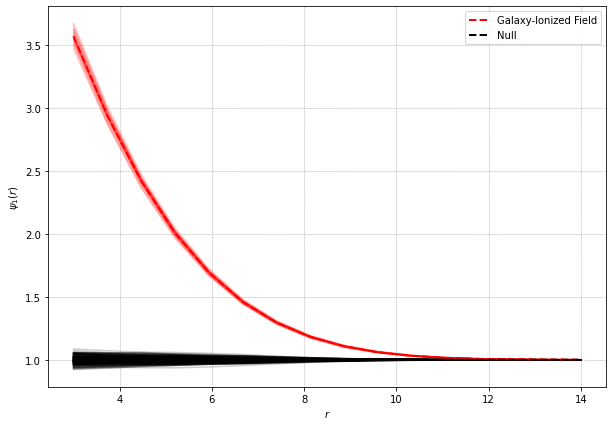

In [5]:
# Plotting for k=1
plt.figure(figsize=(10, 7))
for i in range(n_data):
    plt.plot(bins_knn[:, 0],psi[0,i],color='r',alpha=0.2)
for i in range(n_null):
    plt.plot(bins_knn[:, 0],psi_null[0,i],color='k',alpha=0.2)

plt.plot(bins_knn[:, 0], np.mean(psi[0], axis=0), color='r', ls='dashed',label='Galaxy-Ionized Field',lw=2) 
plt.plot(bins_knn[:, 0], np.mean(psi_null[0], axis=0), color='k', ls='dashed',label='Null',lw=2) 

plt.ylabel(r'$\psi_1(r)$')
plt.xlabel(r'$r$')
plt.legend()
plt.grid(True)  
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

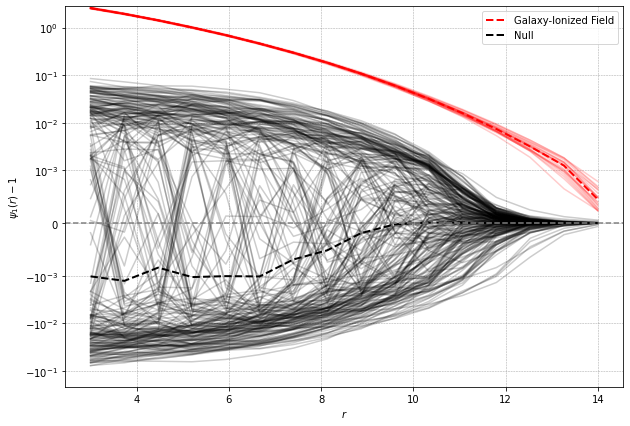

In [6]:
plt.figure(figsize=(10, 7))

# Individual runs, centered at y=1
for i in range(n_data):
    plt.plot(bins_knn[:, 0], psi[0, i] - 1, color='r', alpha=0.2)
for i in range(n_null):
    plt.plot(bins_knn[:, 0], psi_null[0, i] - 1, color='k', alpha=0.2)

# Mean curves, centered at y=1
plt.plot(bins_knn[:, 0], np.mean(psi[0], axis=0) - 1, color='r', ls='dashed',
         label='Galaxy-Ionized Field', lw=2)
plt.plot(bins_knn[:, 0], np.mean(psi_null[0], axis=0) - 1, color='k', ls='dashed',
         label='Null', lw=2)

# Now the "zero" line is the old y=1
plt.axhline(0, color='gray', linestyle='--')

# Zoomed scale
plt.yscale('symlog', linthresh=1e-3)  # sensitivity near 0 (old y=1)


plt.ylabel(r'$\psi_1(r) - 1$') 
plt.xlabel(r'$r$')
plt.legend()
plt.grid(True)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

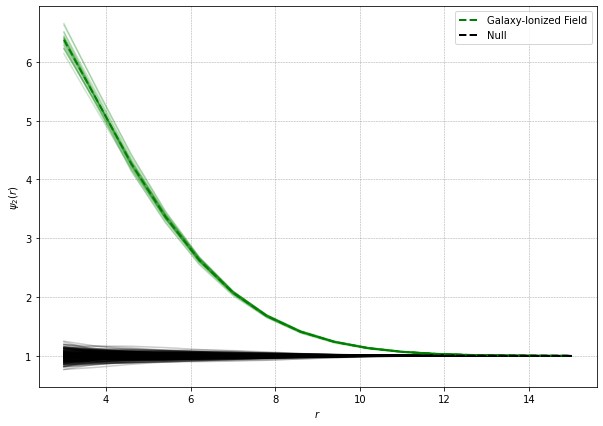

In [7]:
# Plotting for k=2
plt.figure(figsize=(10, 7))
for i in range(n_data):
    plt.plot(bins_knn[:, 1],psi[1,i],color='g',alpha=0.2)
for i in range(n_null):
    plt.plot(bins_knn[:, 1],psi_null[1,i],color='k',alpha=0.2)

plt.plot(bins_knn[:, 1], np.mean(psi[1], axis=0), color='g', ls='dashed',label='Galaxy-Ionized Field',lw=2) 
plt.plot(bins_knn[:, 1], np.mean(psi_null[1], axis=0), color='k', ls='dashed',label='Null',lw=2) 

plt.ylabel(r'$\psi_2(r)$')
plt.xlabel(r'$r$')
plt.legend()
plt.grid(True)  
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

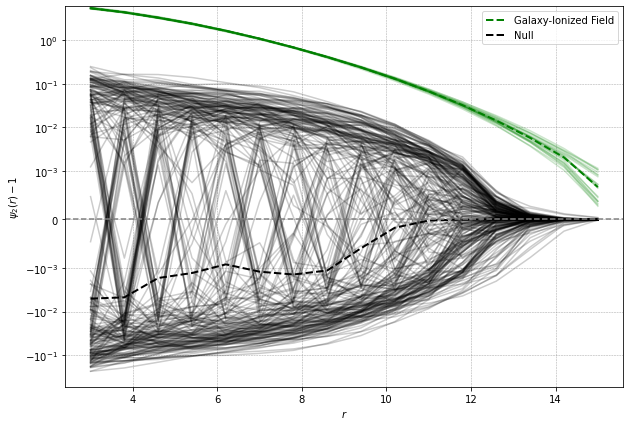

In [8]:
plt.figure(figsize=(10, 7))

# Individual runs, centered at y=1
for i in range(n_data):
    plt.plot(bins_knn[:, 1], psi[1, i] - 1, color='g', alpha=0.2)
for i in range(n_null):
    plt.plot(bins_knn[:, 1], psi_null[1, i] - 1, color='k', alpha=0.2)

# Mean curves, centered at y=1
plt.plot(bins_knn[:, 1], np.mean(psi[1], axis=0) - 1, color='g', ls='dashed',
         label='Galaxy-Ionized Field', lw=2)
plt.plot(bins_knn[:, 1], np.mean(psi_null[1], axis=0) - 1, color='k', ls='dashed',
         label='Null', lw=2)

# Now the "zero" line is the old y=1
plt.axhline(0, color='gray', linestyle='--')

# Zoomed scale
plt.yscale('symlog', linthresh=1e-3)  # sensitivity near 0 (old y=1)


plt.ylabel(r'$\psi_2(r) - 1$')  
plt.xlabel(r'$r$')
plt.legend()
plt.grid(True)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

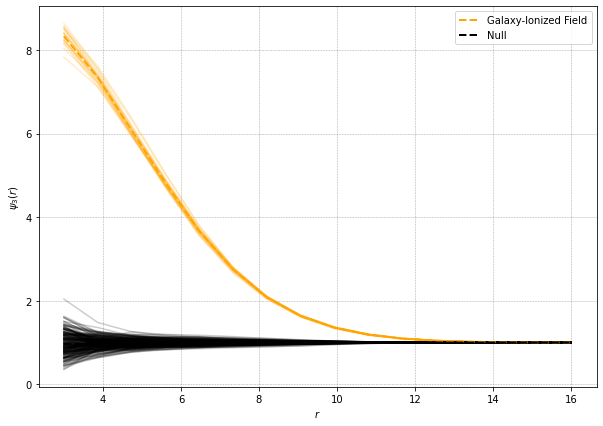

In [9]:
# Plotting for k=3
plt.figure(figsize=(10, 7))
for i in range(n_data):
    plt.plot(bins_knn[:, 2],psi[2,i],color='orange',alpha=0.2)
for i in range(n_null):
    plt.plot(bins_knn[:, 2],psi_null[2,i],color='k',alpha=0.2)

plt.plot(bins_knn[:, 2], np.mean(psi[2], axis=0), color='orange', ls='dashed',label='Galaxy-Ionized Field',lw=2) 
plt.plot(bins_knn[:, 2], np.mean(psi_null[2], axis=0), color='k', ls='dashed',label='Null',lw=2) 

plt.ylabel(r'$\psi_3(r)$')
plt.xlabel(r'$r$')
plt.legend()
plt.grid(True)  
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

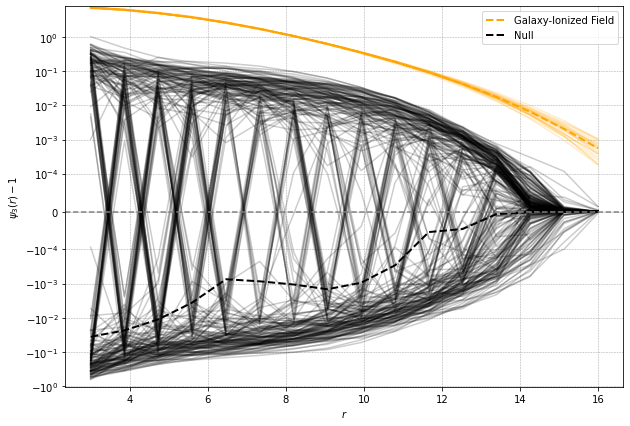

In [10]:
plt.figure(figsize=(10, 7))

# Individual runs, centered at y=1
for i in range(n_data):
    plt.plot(bins_knn[:, 2], psi[2, i] - 1, color='orange', alpha=0.2)
for i in range(n_null):
    plt.plot(bins_knn[:, 2], psi_null[2, i] - 1, color='k', alpha=0.2)

# Mean curves, centered at y=1
plt.plot(bins_knn[:, 2], np.mean(psi[2], axis=0) - 1, color='orange', ls='dashed',
         label='Galaxy-Ionized Field', lw=2)
plt.plot(bins_knn[:, 2], np.mean(psi_null[2], axis=0) - 1, color='k', ls='dashed',
         label='Null', lw=2)

# Now the "zero" line is the old y=1
plt.axhline(0, color='gray', linestyle='--')

# Zoomed scale
plt.yscale('symlog', linthresh=1e-4)  # sensitivity near 0 (old y=1)


plt.ylabel(r'$\psi_3(r) - 1$')  
plt.xlabel(r'$r$')
plt.legend()
plt.grid(True)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()